In [76]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [77]:
#Load the dataset
Bank_data = pd.read_csv("Customer-Churn-Records.csv")

In [78]:
Bank_data = Bank_data.head(n=200)

In [79]:
Bank_data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,15594815,Aleshire,807,France,Male,35,3,174790.15,1,1,1,600.36,0,0,3,SILVER,861
196,197,15635905,Moran,616,Spain,Female,32,6,0.00,2,1,1,43001.46,0,0,5,GOLD,512
197,198,15777892,Samsonova,721,Germany,Male,37,3,107720.64,1,1,1,158591.12,0,0,1,PLATINUM,478
198,199,15656176,Jenkins,501,France,Male,57,10,0.00,2,1,1,47847.19,0,0,5,PLATINUM,374


In [80]:
Bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,100.500000,1.568974e+07,639.420000,38.005000,5.190000,74172.009650,1.545000,0.67500,0.480000,99655.989050,0.205000,0.22500,3.105000,576.000000
std,57.879185,7.133593e+04,107.711104,9.772023,2.986385,62705.879163,0.591374,0.46955,0.500854,57404.773161,0.404715,0.41863,1.386937,226.834343
min,1.000000,1.556898e+07,376.000000,19.000000,0.000000,0.000000,1.000000,0.00000,0.000000,600.360000,0.000000,0.00000,1.000000,119.000000
25%,50.750000,1.562570e+07,552.250000,32.000000,2.750000,0.000000,1.000000,0.00000,0.000000,47666.670000,0.000000,0.00000,2.000000,398.500000
50%,100.500000,1.569291e+07,645.500000,36.000000,5.000000,96534.690000,2.000000,1.00000,0.000000,99547.450000,0.000000,0.00000,3.000000,549.000000
75%,150.250000,1.575429e+07,721.250000,43.000000,8.000000,125634.460000,2.000000,1.00000,1.000000,147402.005000,0.000000,0.00000,4.000000,769.250000
max,200.000000,1.581288e+07,850.000000,75.000000,10.000000,213146.200000,4.000000,1.00000,1.000000,199725.390000,1.000000,1.00000,5.000000,994.000000


In [81]:
# Checking for null values
Bank_data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [82]:
#Length of the dataset
len(Bank_data)

200

In [83]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           200 non-null    int64  
 1   CustomerId          200 non-null    int64  
 2   Surname             200 non-null    object 
 3   CreditScore         200 non-null    int64  
 4   Geography           200 non-null    object 
 5   Gender              200 non-null    object 
 6   Age                 200 non-null    int64  
 7   Tenure              200 non-null    int64  
 8   Balance             200 non-null    float64
 9   NumOfProducts       200 non-null    int64  
 10  HasCrCard           200 non-null    int64  
 11  IsActiveMember      200 non-null    int64  
 12  EstimatedSalary     200 non-null    float64
 13  Exited              200 non-null    int64  
 14  Complain            200 non-null    int64  
 15  Satisfaction Score  200 non-null    int64  
 16  Card Typ

In [84]:
# Count of geography
geography_counts = Bank_data['Geography'].value_counts()

In [85]:
geography_counts

Geography
France     88
Germany    57
Spain      55
Name: count, dtype: int64

In [86]:
# Top 10 Bank Customers in France
France_data = Bank_data[Bank_data['Geography'] == 'France']
top_10_France_counts = France_data.head(10)


In [87]:
top_10_France_counts

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0,0,3,GOLD,264
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0,0,3,SILVER,119
13,14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0,0,3,PLATINUM,549
19,20,15568982,Hao,726,France,Female,24,6,0.00,2,1,1,54724.03,0,0,4,GOLD,477


In [88]:
France_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,193,15756850,Golovanov,479,France,Male,40,1,0.00,2,0,0,114996.43,0,0,3,SILVER,909
193,194,15702741,Potts,601,France,Male,32,8,93012.89,1,1,0,86957.42,0,0,2,GOLD,799
195,196,15594815,Aleshire,807,France,Male,35,3,174790.15,1,1,1,600.36,0,0,3,SILVER,861
198,199,15656176,Jenkins,501,France,Male,57,10,0.00,2,1,1,47847.19,0,0,5,PLATINUM,374


In [89]:
def scatter_plot(Bank_data, CreditScore, Age):
    """
    plot the scatter plot CreditScore vs Age

    """
    
    plt.figure(figsize=(5,5))
    plt.scatter(Bank_data["CreditScore"], Bank_data["Age"], color = 'orange')
    plt.xlabel('Credit score of customers')
    plt.ylabel('Age of customers')
    plt.title( 'Creditscore Of Customers WorldWide')
    plt.show()

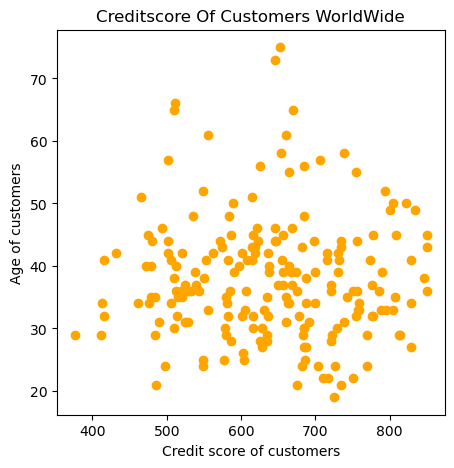

In [91]:
scatter_plot(Bank_data, 'CreditScore', 'Age')

In [92]:
Spain_data = Bank_data[Bank_data['Geography'] == 'Spain']
top_10_Spain_counts = Spain_data.head(10)


In [93]:
Spain_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,0,3,GOLD,249
14,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0,0,2,GOLD,318
17,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0,0,3,SILVER,544
18,19,15661507,Muldrow,587,Spain,Male,45,6,0.00,1,0,0,158684.81,0,0,3,PLATINUM,732
21,22,15597945,Dellucci,636,Spain,Female,32,8,0.00,2,1,0,138555.46,0,0,2,DIAMOND,336
22,23,15699309,Gerasimov,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1,1,2,DIAMOND,887
30,31,15589475,Azikiwe,591,Spain,Female,39,3,0.00,3,1,0,140469.38,1,1,3,DIAMOND,298


In [94]:
def histogram_plot(Spain_data, Point_Earned, bins=10, color='blue'):
    """
    plot a histogram

    """
    plt.figure(figsize=(8,5))
    plt.hist(Spain_data["Point Earned"])
    plt.xlabel('points earned by customers')
    plt.ylabel('count')
    plt.title('Points Earned By Customers In Spain')
    plt.show()


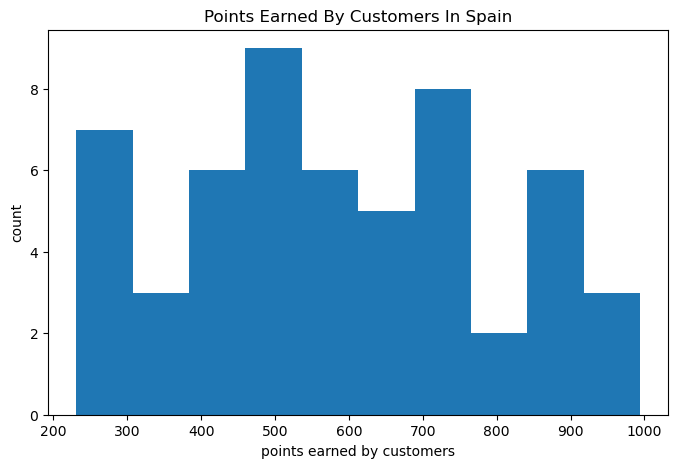

In [95]:
histogram_plot(Spain_data, 'Point Earned')

In [96]:

Spain_data = Bank_data[Bank_data['Geography'] == 'Spain']
top_1_Spain_counts = Spain_data.head(1)

In [97]:
top_1_Spain_counts

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [98]:
France_data = Bank_data[Bank_data['Geography'] == 'France']
top_1_France_counts = France_data.head(1)

In [99]:
top_1_France_counts

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464


In [100]:
def Violin_plot(Bank_data, Geography, CreditScore, Distribution_of_Credit_Scores_by_Geography_and_Gender):
    """
    plot a violin plot

    """
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Geography', y='CreditScore', hue='Gender', data=Bank_data, split=True)
    plt.xlabel('Geography')
    plt.ylabel('Credit Score')
    plt.title('Distribution of Credit Scores by Geography and Gender')
    plt.show()

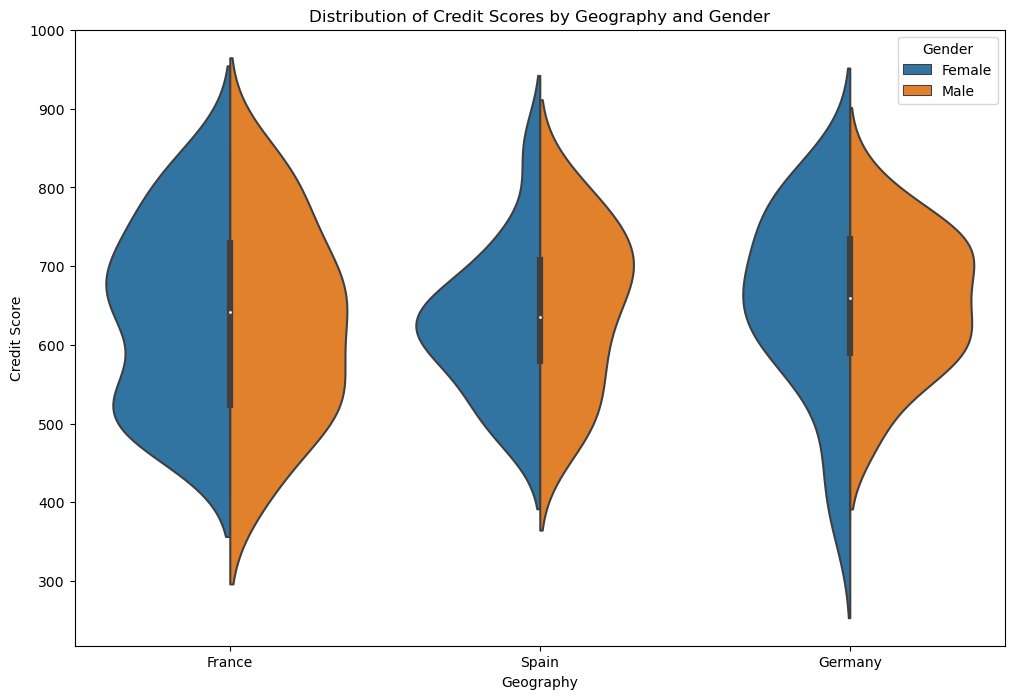

In [101]:
Violin_plot(Bank_data, "Geography", "CreditScore", "Distribution of Credit Scores by Geography and gender")

In [102]:

features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']
Bank_data1 = Bank_data[features]


def plot_elbow(Bank_data1, max_clusters=10):
    """
    Plots an elbow plot for KMeans clustering.
    """
    wcss = []  # Within-cluster sum of squares
    
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i,n_init=10,random_state=42)
        kmeans.fit(Bank_data1)
        
        # Elbow method: Calculate within-cluster sum of squares (WCSS)
        wcss.append(kmeans.inertia_)
        
    # Plotting elbow plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.xticks(range(2, max_clusters + 1))
    plt.grid(True)    
    plt.tight_layout()
    plt.show()


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

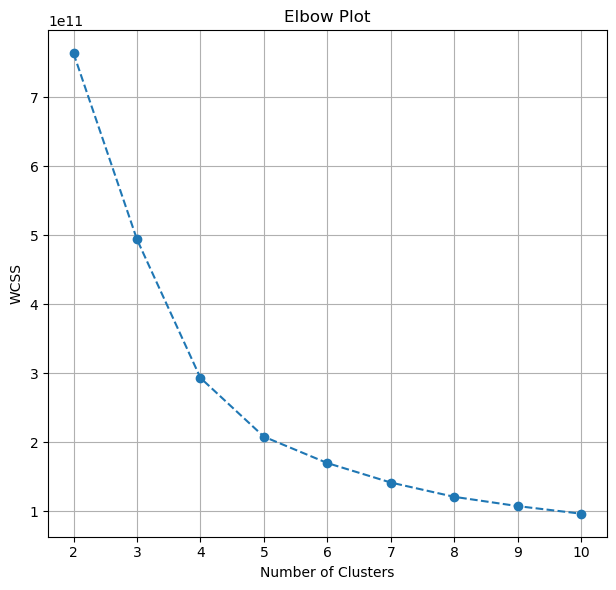

In [103]:
plot_elbow(Bank_data1, max_clusters=10)

In [33]:
max_clusters=10
wcss = []  
    
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=42)
    kmeans.fit(Bank_data1)
    wcss.append(kmeans.inertia_)

C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [104]:
def perform_kmeans_clustering(X, max_clusters=10):
    """
    Performs KMeans clustering
    """
    optimal_num_clusters = 4
    
    # Perform KMeans clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10,  random_state=42)
    kmeans.fit(X)
    
    cluster_centers = kmeans.cluster_centers_
    
    return kmeans, cluster_centers

C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


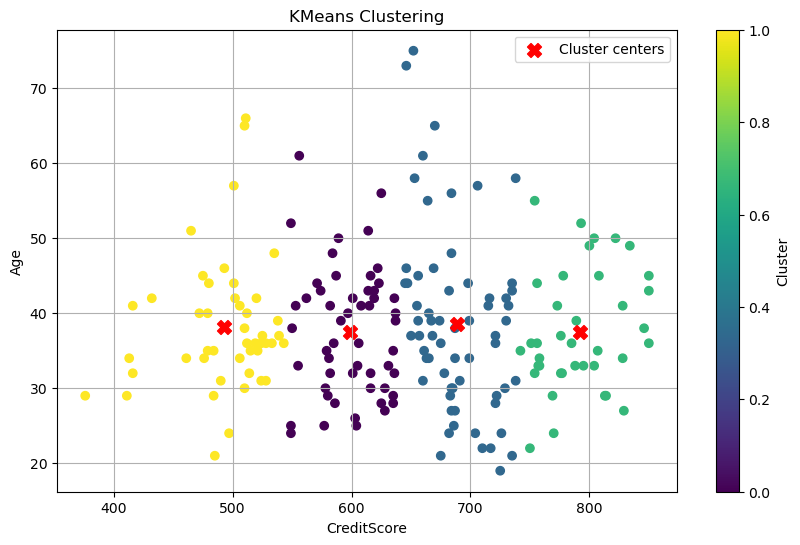

In [105]:
features = ['CreditScore', 'Age']
target = 'Point Earned'

# Perform KMeans clustering
kmeans_model, cluster_centers = perform_kmeans_clustering(Bank_data[features])


cluster_labels = kmeans_model.labels_

#plot cluter model
plt.figure(figsize=(10, 6))
plt.scatter(Bank_data[features[0]], Bank_data[features[1]], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=100, c='red', label='Cluster centers')
plt.title('KMeans Clustering')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc="upper right")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

In [106]:

data_for_fitting = Bank_data[features + [target]].copy()
    

data_for_fitting.dropna(inplace=True)
    
# Split data into features (X) and target variable (y)
X = data_for_fitting[features]
y = data_for_fitting[target]
    
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
def perform_multiple_linear_regression(data, features, target):
    """
    Perform multiple linear regression on NBA data.
    """
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    
    return model, mse

features = ['CreditScore', 'Age', 'Satisfaction_Score']
target = 'Point Earned'

In [108]:

model, mse = perform_multiple_linear_regression(Bank_data, features, target)

# Print model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Mean Squared Error:", mse)

Coefficients: [0.27607955 0.8567683 ]
Intercept: 385.7263443976137
Mean Squared Error: 61199.29515284121


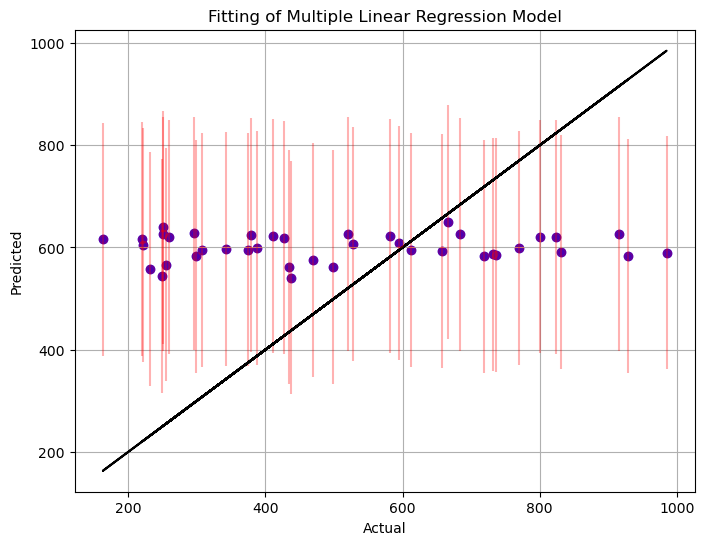

In [109]:
def plot_fitting(actual, predicted):
    """
    Plot the fitting of a model by visualizing the actual versus predicted values.
    """
    residuals = predicted - actual
    std_residuals = np.std(residuals)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted, color='blue')
    plt.errorbar(actual, predicted, yerr=std_residuals, fmt='o', color='red',alpha=0.3, label='Data with Error Bars')
    plt.plot(actual, actual, color='black', linestyle='-',alpha=1)  # Plot the diagonal line (y = x)
    plt.title('Fitting of Multiple Linear Regression Model')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

y_test_pred = model.predict(X_test)
plot_fitting(y_test, y_test_pred)

In [110]:
Bank_data1.corr()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.022236,0.066513,-0.110271,0.094330,0.144277,0.038723,0.122331
Age,-0.022236,1.000000,-0.026538,-0.075256,0.066244,-0.073526,0.018500,-0.021870
Balance,0.066513,-0.026538,1.000000,-0.270782,-0.053925,-0.002001,-0.031333,0.026549
NumOfProducts,-0.110271,-0.075256,-0.270782,1.000000,-0.073292,0.017321,-0.008853,-0.150180
IsActiveMember,0.094330,0.066244,-0.053925,-0.073292,1.000000,-0.032122,0.035591,0.050291
EstimatedSalary,0.144277,-0.073526,-0.002001,0.017321,-0.032122,1.000000,-0.079245,0.053798
Satisfaction Score,0.038723,0.018500,-0.031333,-0.008853,0.035591,-0.079245,1.000000,0.105133
Point Earned,0.122331,-0.021870,0.026549,-0.150180,0.050291,0.053798,0.105133,1.000000


In [111]:
Bank_data1.kurt()

CreditScore          -0.727017
Age                   1.523619
Balance              -1.491662
NumOfProducts         1.331887
IsActiveMember       -2.013731
EstimatedSalary      -1.095642
Satisfaction Score   -1.249560
Point Earned         -1.072580
dtype: float64

In [112]:
Bank_data1.skew()

CreditScore          -0.072175
Age                   0.933177
Balance              -0.062721
NumOfProducts         0.854984
IsActiveMember        0.080670
EstimatedSalary      -0.001270
Satisfaction Score   -0.052914
Point Earned          0.115999
dtype: float64

In [113]:
Bank_data1.std()

CreditScore             107.711104
Age                       9.772023
Balance               62705.879163
NumOfProducts             0.591374
IsActiveMember            0.500854
EstimatedSalary       57404.773161
Satisfaction Score        1.386937
Point Earned            226.834343
dtype: float64

In [114]:
Bank_data1.mean()

CreditScore             639.42000
Age                      38.00500
Balance               74172.00965
NumOfProducts             1.54500
IsActiveMember            0.48000
EstimatedSalary       99655.98905
Satisfaction Score        3.10500
Point Earned            576.00000
dtype: float64

In [115]:
Bank_data1.median()

CreditScore             645.50
Age                      36.00
Balance               96534.69
NumOfProducts             2.00
IsActiveMember            0.00
EstimatedSalary       99547.45
Satisfaction Score        3.00
Point Earned            549.00
dtype: float64